In [3]:
import pandas as pd
import matplotlib.pyplot as plt

1. csv폴더에서 drinks.csv 파일 로드
2. 결측치를 확인
3. 결측치 continent칼럼에 결측치 존재 -> 결측치 값은 'OT'로 지정
4. continent 별 spirit_servings 칼럼의 평균,최소,최대,합을 출력
5. 이 데이터들을 바 그래프로 출력

In [6]:
drinks_data = pd.read_csv("../csv/drinks.csv")

In [7]:
drinks_data.isna().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

#결측치 대체 : fillna(a) / NA값이라고 지정되어 있는 값들을 한 그룹으로 묶어서 평균,최소,최댓값들을 나타낸 것


In [31]:

drinks_data["continent"] = drinks_data["continent"].fillna('OT')

In [11]:
drinks_data.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [30]:
x = np.arange(6)
continent = ["AF","AS","EU","OC","OT","SA"]
values = ["866","2677","5965","935","3812","1377"]

In [56]:
drinks_data.groupby("continent").agg(['mean','min','max','sum'])['spirit_servings']

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_25524\2175580480.py:1: FutureWarning: ['country'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  drinks_data.groupby("continent").agg(['mean','min','max','sum'])['spirit_servings']


,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812
SA,114.750000,25,302,1377


In [39]:
result = drinks_data.groupby("continent").agg(['mean','min','max','sum'])['spirit_servings']



C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_25524\2792180793.py:1: FutureWarning: ['country'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  result = drinks_data.groupby("continent").agg(['mean','min','max','sum'])['spirit_servings']


In [22]:
drinks_data.groupby("continent")["spirit_servings"].min()


continent
AF     0
AS     0
EU     0
OC     0
OT    68
SA    25
Name: spirit_servings, dtype: int64

In [23]:

drinks_data.groupby("continent")["spirit_servings"].max()

continent
AF    152
AS    326
EU    373
OC    254
OT    438
SA    302
Name: spirit_servings, dtype: int64

In [25]:
drinks_data.groupby("continent")["spirit_servings"].mean()

continent
AF     16.339623
AS     60.840909
EU    132.555556
OC     58.437500
OT    165.739130
SA    114.750000
Name: spirit_servings, dtype: float64

In [57]:
drinks_data.groupby("continent")["spirit_servings"].sum()

continent
AF     866
AS    2677
EU    5965
OC     935
OT    3812
SA    1377
Name: spirit_servings, dtype: int64

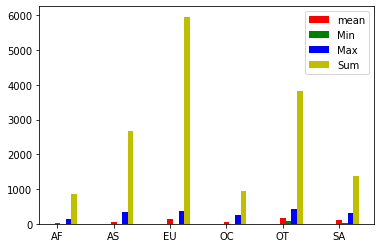

In [58]:
means = drinks_data.groupby("continent")["spirit_servings"].mean()
mins = drinks_data.groupby("continent")["spirit_servings"].min()
maxs = drinks_data.groupby("continent")["spirit_servings"].max()
sums = drinks_data.groupby("continent")["spirit_servings"].sum()
n = len(result.index)
index = np.arange(n)
bar_width = 0.1

plt.bar(index, means, bar_width, color='r', label ='mean')
plt.bar(index+bar_width,mins,bar_width,color='g',label='Min')
plt.bar(index+bar_width*2, maxs, bar_width,color='b',label='Max' )
plt.bar(index+bar_width*3,sums,bar_width,color='y',label='Sum')

plt.xticks(index,result.index.tolist())
plt.legend()

plt.show()

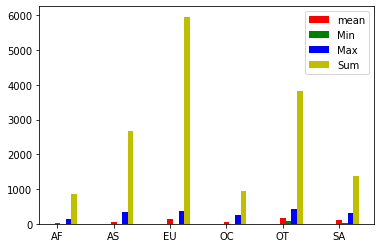

In [45]:
# result값을 가지고 바형 그래프 생성

means = result['mean']
mins = result['min']
maxs = result['max']
sums = result['sum']
n = len(result.index)
index = np.arange(n)
bar_width = 0.1

plt.bar(index, means, bar_width, color='r', label ='mean')
plt.bar(index+bar_width,mins,bar_width,color='g',label='Min')
plt.bar(index+bar_width*2, maxs, bar_width,color='b',label='Max' )
plt.bar(index+bar_width*3,sums,bar_width,color='y',label='Sum')

plt.xticks(index,result.index.tolist())
plt.legend()

plt.show()

In [50]:
drinks=drinks_data.head()

In [49]:
drinks_data.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [52]:
total_mean = drinks['total_litres_of_pure_alcohol'].mean()
total_mean

4.779999999999999

In [53]:
drinks.groupby('continent').mean()['total_litres_of_pure_alcohol']

continent
AF    3.30
AS    0.00
EU    8.65
Name: total_litres_of_pure_alcohol, dtype: float64

In [54]:
continent_mean = drinks.groupby('continent').mean()['total_litres_of_pure_alcohol']

In [55]:
continent_over_mean = continent_mean[continent_mean >= total_mean]
continent_over_mean

continent
EU    8.65
Name: total_litres_of_pure_alcohol, dtype: float64